<a href="https://colab.research.google.com/github/girupashankar/Deep-Learning/blob/main/Basic_Feedforward_Neural_Networks_(FNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Basic Feedforward Neural Networks (FNN)

#### Overview
Feedforward Neural Networks (FNNs) are the simplest type of artificial neural network. They consist of an input layer, one or more hidden layers, and an output layer. Each neuron in a layer is connected to every neuron in the next layer, and the information flows in one direction: from input to output.

#### Key Components
1. **Neurons**: Basic units of a neural network that perform computations.
2. **Layers**: Structures made up of neurons, typically including input, hidden, and output layers.
3. **Weights and Biases**: Parameters that are adjusted during training to minimize the error of the network's predictions.
4. **Activation Functions**: Functions applied to the output of each neuron to introduce non-linearity, helping the network to learn complex patterns.

#### Training Process
1. **Forward Propagation**: Calculating the output of the network by passing the input data through each layer.
2. **Loss Calculation**: Comparing the predicted output to the actual output to compute the error.
3. **Backward Propagation**: Adjusting the weights and biases to minimize the error, using the gradient descent algorithm.

### Real-World Examples

1. **Predicting Housing Prices**
   - **Problem**: Estimate the price of a house based on features like size, number of bedrooms, age, and location.
   - **Application**: Real estate market analysis, online property valuation tools.

2. **Binary Classification for Email Spam Detection**
   - **Problem**: Classify emails as spam or not spam.
   - **Application**: Email filtering systems used by email providers.

3. **Handwritten Digit Recognition**
   - **Problem**: Recognize digits (0-9) from handwritten images.
   - **Application**: Optical Character Recognition (OCR) for digitizing handwritten documents.

### Code Example: Predicting Housing Prices

Here's a simple example using Python with TensorFlow and Keras to create a basic FNN for predicting housing prices.


### Explanation:
1. **Data Preparation**: A synthetic dataset is generated with features such as size, bedrooms, age, and location. The target variable is the house price.
2. **Data Splitting**: The data is split into training and testing sets.
3. **Normalization**: Features are normalized to improve the training process.
4. **Model Building**: A Sequential model with two hidden layers is created using Keras. The `Dense` layers represent fully connected layers.
5. **Compilation and Training**: The model is compiled with the Adam optimizer and Mean Squared Error loss function. It is trained on the training data.
6. **Evaluation and Prediction**: The model's performance is evaluated on the test set, and predictions are made. The results are printed and plotted to visualize training progress.

This example demonstrates a basic FNN applied to a regression problem. You can extend this framework to other types of problems and datasets by adjusting the network architecture and preprocessing steps accordingly.

Epoch 1/100
10/10 [==============================] - 1s 24ms/step - loss: 832303136768.0000 - val_loss: 825093193728.0000
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 832302481408.0000 - val_loss: 825092472832.0000
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 832301563904.0000 - val_loss: 825091555328.0000
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 832300515328.0000 - val_loss: 825090244608.0000
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 832299204608.0000 - val_loss: 825088671744.0000
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 832297238528.0000 - val_loss: 825086705664.0000
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 832294879232.0000 - val_loss: 825084149760.0000
Epoch 8/100
10/10 [==============================] - 0s 8ms/step - loss: 832291995648.0000 - val_loss: 825081004032.0000
Epoch 9/100
10/10 [============

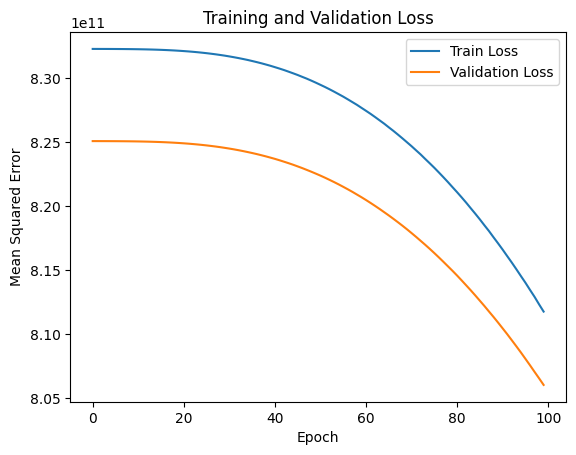

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generate a sample dataset (replace this with your actual dataset)
np.random.seed(0)
data_size = 500
features = pd.DataFrame({
    'size': np.random.randint(500, 5000, data_size),
    'bedrooms': np.random.randint(1, 5, data_size),
    'age': np.random.randint(1, 30, data_size),
    'location': np.random.randint(1, 10, data_size)
})
prices = features['size'] * 300 + features['bedrooms'] * 5000 - features['age'] * 200 + features['location'] * 1000 + np.random.randint(-10000, 10000, data_size)

# Combine features and prices into a single DataFrame
df = pd.concat([features, pd.Series(prices, name='price')], axis=1)

# Split the data into training and testing sets
X = df.drop('price', axis=1).values
y = df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the FNN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {test_loss}')

# Predicting house prices for the test set
predictions = model.predict(X_test)

# Displaying a few predictions alongside actual prices
for i in range(10):
    print(f'Actual Price: {y_test[i]}, Predicted Price: {predictions[i][0]}')

# Visualize training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()